<a href="https://colab.research.google.com/github/mnldvd/-MiSistemaRecomendacion/blob/master/1_Master_DS_UPC_ComplexNetworks_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Sampling nodes and edges

You will learn to:
* use the networkx package
* sample nodes / edges

## 1. The networkx package

In [ ]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### First graph

In [ ]:
# Building the graph
graph = nx.Graph(name="Mi primer grafo")
graph.add_edge(1,2)
graph.add_edge(2,3)

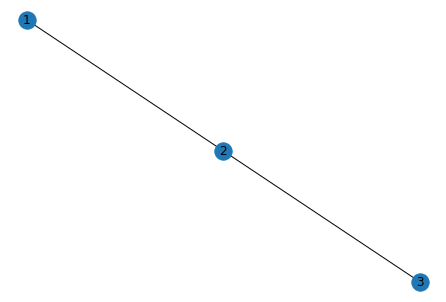

In [ ]:
# Visualization
nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
# Summary
print(nx.info(graph))

Name: Mi primer grafo
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [ ]:
# List of nodes 
print(list(graph.nodes()))

[1, 2, 3]


In [ ]:
# Iterator on nodes
for n in graph.nodes():
  print(n)

1
2
3


In [ ]:
# First node through the list / the iterator
nodes = list(graph.nodes())
print(nodes[0])

1


In [ ]:
#Get the second node using the list and the iterator

nodes_iter = iter(graph.nodes())
print(next(nodes_iter))
print(next(nodes_iter))

1
2


In [ ]:
#Get the first edge using the list of edges and the iterator on edges
edges = list(graph.edges)
print(edges[0])

(1, 2)


In [ ]:
edges_iter = iter(graph.edges)
print(next(edges_iter))
print(next(edges_iter))

(1, 2)
(2, 3)


### Second graph

In [ ]:
# Building the graph
social_graph = nx.Graph(name="Social")
social_graph.add_edge('Alberto','Barbara')
social_graph.add_edge('Alberto','Carol')
social_graph.add_edge('Barbara','Daniel')
social_graph.add_edge('Alberto','Daniel')

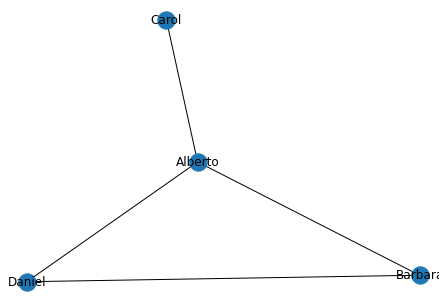

In [ ]:
# Visualization
nx.draw(social_graph, with_labels=True)
plt.show()

In [ ]:
# Summary
print(nx.info(social_graph))

Name: Social
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [ ]:
# List of nodes / edges
print(social_graph.nodes())
print(social_graph.edges())

['Alberto', 'Barbara', 'Carol', 'Daniel']
[('Alberto', 'Barbara'), ('Alberto', 'Carol'), ('Alberto', 'Daniel'), ('Barbara', 'Daniel')]


In [ ]:
# Node degree
social_graph.degree('Alberto')

3

In [ ]:
# Neighbors
for v in social_graph.neighbors('Alberto'):
  print(v)

Barbara
Carol
Daniel


In [ ]:
# List of node degrees
degrees = [social_graph.degree(u) for u in social_graph.nodes()]
degrees

[3, 2, 1, 2]

In [ ]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
  print(u, social_graph[u])

Alberto {'Barbara': {}, 'Carol': {}, 'Daniel': {}}
Barbara {'Alberto': {}, 'Daniel': {}}
Carol {'Alberto': {}}
Daniel {'Barbara': {}, 'Alberto': {}}


In [ ]:
# Modifying the graph
new_edges = [('Barbara','Evelyn'),('Evelyn','Daniel')]
social_graph.add_edges_from(new_edges)

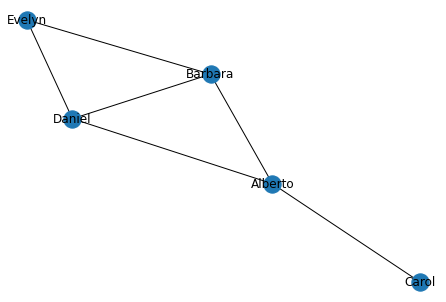

In [ ]:
# Visualization
nx.draw(social_graph, with_labels=True)
plt.show()

### Layout

The layout allows you to visualize the graph (in 2D).

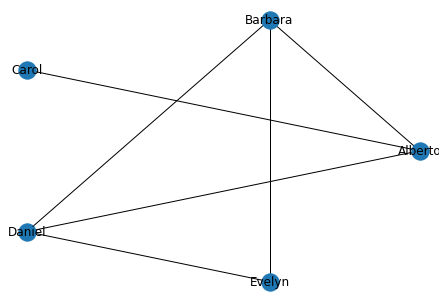

In [ ]:
# Layout based on springs (default layout)
pos = nx.circular_layout(social_graph)
nx.draw(social_graph, pos,  with_labels=True)

In [ ]:
print(pos)

{'Alberto': array([1., 0.]), 'Barbara': array([0.30901695, 0.95105657]), 'Carol': array([-0.80901706,  0.58778526]), 'Daniel': array([-0.809017  , -0.58778532]), 'Evelyn': array([ 0.3090171 , -0.95105651])}


Observe that two instances of the spring layout are generally not the same!

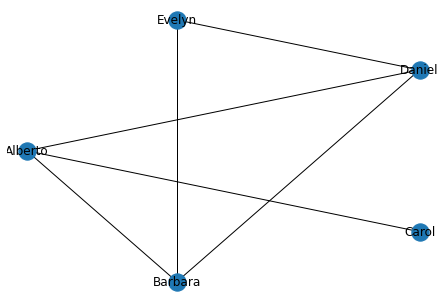

In [ ]:
# Another layout
pos = nx.shell_layout(social_graph)
nx.draw(social_graph, pos,  with_labels=True)

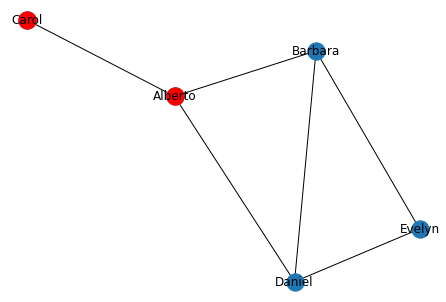

In [ ]:
# Changing the color of some nodes
pos = nx.spring_layout(social_graph)
nx.draw(social_graph, pos, with_labels=True)
nodes = nx.draw_networkx_nodes(social_graph, pos, nodelist=['Alberto','Carol'], node_color='red')

### Node labels

In most cases, the $n$ nodes are indexed from 0 to $n-1$. The name of each node (if any) is then stored as a label.

In [ ]:
# Indexing nodes
names = list(social_graph.nodes())
social_graph = nx.convert_node_labels_to_integers(social_graph)

In [ ]:
# Adding names as labels
for i in social_graph.nodes():
  social_graph.nodes()[i]['name'] = names[i]

In [ ]:
from tabulate import tabulate

In [ ]:
for u in social_graph.nodes():
  print(u, social_graph.nodes()[u])

0 {'name': 'Alberto'}
1 {'name': 'Barbara'}
2 {'name': 'Carol'}
3 {'name': 'Daniel'}
4 {'name': 'Evelyn'}


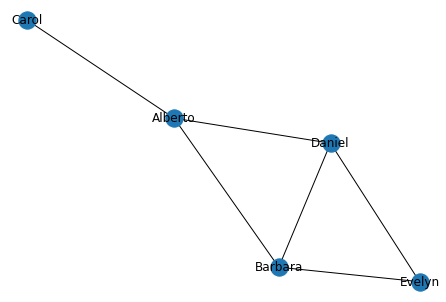

In [ ]:
names = nx.get_node_attributes(social_graph, 'name')
nx.draw(social_graph, labels=names)

In [ ]:
# Adding other labels
women = ['Barbara', 'Carol', 'Evelyn']

for u in social_graph.nodes():
  if social_graph.nodes()[u]['name'] in women:
    social_graph.nodes()[u]['gender'] = 'Female'
  else:
    social_graph.nodes()[u]['gender'] = 'Male'

In [ ]:
for u in social_graph.nodes():
  print(u, social_graph.nodes()[u])

0 {'name': 'Alberto', 'gender': 'Male'}
1 {'name': 'Barbara', 'gender': 'Female'}
2 {'name': 'Carol', 'gender': 'Female'}
3 {'name': 'Daniel', 'gender': 'Male'}
4 {'name': 'Evelyn', 'gender': 'Female'}


In [ ]:
# Store the positions as labels
pos = nx.spring_layout(social_graph)
for u in social_graph.nodes():
  social_graph.nodes()[u]['pos'] = tuple(pos[u])

In [ ]:
for u in social_graph.nodes():
  print(u, social_graph.nodes()[u])

0 {'name': 'Alberto', 'gender': 'Male', 'pos': (0.16848425584742618, -0.325971035380057)}
1 {'name': 'Barbara', 'gender': 'Female', 'pos': (0.08180470899451013, 0.38026351679435627)}
2 {'name': 'Carol', 'gender': 'Female', 'pos': (0.5171775460748153, -1.0)}
3 {'name': 'Daniel', 'gender': 'Male', 'pos': (-0.3577468471722941, 0.1532269546255161)}
4 {'name': 'Evelyn', 'gender': 'Female', 'pos': (-0.4097196637444576, 0.7924805639601843)}


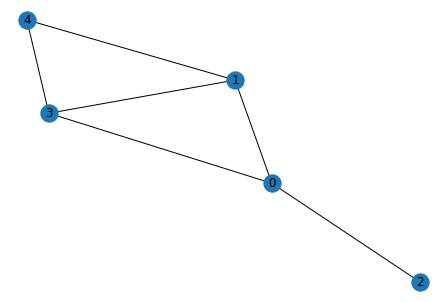

In [ ]:
pos = nx.get_node_attributes(social_graph, 'pos')
nx.draw(social_graph, pos, with_labels=True)

### Edge labels

In [ ]:
# Adding weights
for u,v in social_graph.edges():
  social_graph[u][v]['weight'] = np.random.randint(1,10)

In [ ]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
  print(u, social_graph[u])

0 {1: {'weight': 5}, 2: {'weight': 1}, 3: {'weight': 4}}
1 {0: {'weight': 5}, 3: {'weight': 8}, 4: {'weight': 4}}
2 {0: {'weight': 1}}
3 {0: {'weight': 4}, 1: {'weight': 8}, 4: {'weight': 4}}
4 {1: {'weight': 4}, 3: {'weight': 4}}


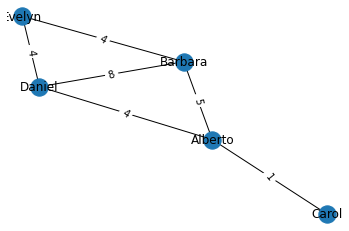

In [ ]:
# Visualization with edge weights
weights = nx.get_edge_attributes(social_graph, 'weight')
nx.draw_networkx_edge_labels(social_graph, pos, edge_labels=weights)
nx.draw(social_graph, pos, labels=names)

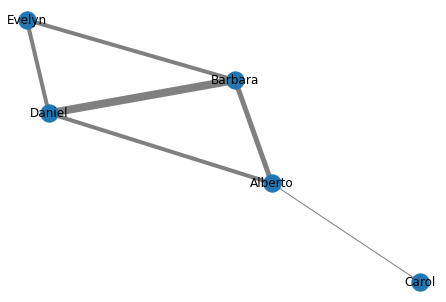

In [ ]:
# Visualization with edge widths = edge weights
weights_list = [weights[e] for e in social_graph.edges()]
nx.draw(social_graph, pos, labels=names, width=weights_list, edge_color='gray')

In [ ]:
# Adding edge labels
categories = ['Family', 'Work', 'Friend']
for u,v in social_graph.edges():
  social_graph[u][v]['category'] = str(np.random.choice(categories))

In [ ]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
  print(u, social_graph[u])

0 {1: {'weight': 5, 'category': 'Friend'}, 2: {'weight': 1, 'category': 'Friend'}, 3: {'weight': 4, 'category': 'Friend'}}
1 {0: {'weight': 5, 'category': 'Friend'}, 3: {'weight': 8, 'category': 'Family'}, 4: {'weight': 4, 'category': 'Family'}}
2 {0: {'weight': 1, 'category': 'Friend'}}
3 {0: {'weight': 4, 'category': 'Friend'}, 1: {'weight': 8, 'category': 'Family'}, 4: {'weight': 4, 'category': 'Friend'}}
4 {1: {'weight': 4, 'category': 'Family'}, 3: {'weight': 4, 'category': 'Friend'}}


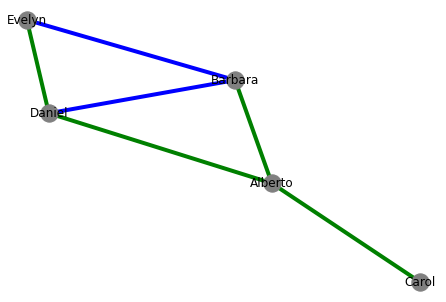

In [ ]:
# Visualization with categories
nx.draw(social_graph, pos, labels=names, node_color='grey')
color_map = {'Family':'b','Work':'r','Friend':'g'}
categories = nx.get_edge_attributes(social_graph,'category')

edge_list = {}
for u, category in categories.items():
  edge_list.setdefault(category,[]).append(u)

for category in edge_list:
  edges = nx.draw_networkx_edges(social_graph, pos, edgelist=edge_list[category], width=4, edge_color=color_map[category])

### Directed graphs

In [ ]:
# Building the graph
edges = [(1,3),(3,2),(1,3),(1,4),(3,5),(2,4),(2,5),(4,3),(5,4),(5,6),(6,1)]
digraph = nx.from_edgelist(edges, create_using=nx.DiGraph())
digraph.graph['name'] = "A directed graph"

In [ ]:
# Summary (observe the type of graph)
print(nx.info(digraph))

Name: A directed graph
Type: DiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667


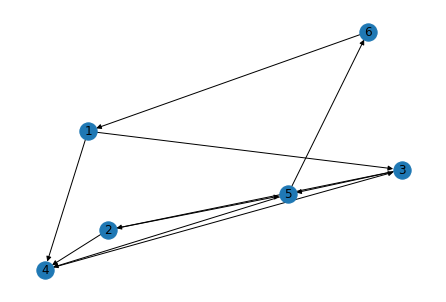

In [ ]:
# Visualization
nx.draw(digraph,with_labels = True)
plt.show()

### Writing and reading graphs

The `networkx` package allows you to write and read graphs in many formats. We will use the `graphml` format. 

In [ ]:
#Replace the label `pos` by two labels, one per coordinate.
pos = nx.spring_layout(digraph)

for u, coordinate in pos.items():
  digraph.nodes(data=True)[u]['pos_x'] = float(coordinate[0])
  digraph.nodes(data=True)[u]['pos_y'] = float(coordinate[1])

In [ ]:
#Save the graph in graphml format.
nx.write_graphml(digraph, "digraph.graphml")

In [ ]:
#Read the graph (use the type `int` for node indices) and check the labels.
graph = nx.read_graphml("digraph.graphml", node_type = int)
print(nx.info(graph))
print(graph.nodes)

Name: A directed graph
Type: DiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667
[1, 3, 2, 4, 5, 6]


## 2. Datasets

You will now work on two real datasets, OpenStreet and Openflights, to be downloaded [here](https://perso.telecom-paristech.fr/bonald/graphs/).

### OpenStreet

OpenStreet is a graph of streets in the center of Paris. Nodes correspond to intersections. The graph is directed due to one-way streets. Weights correspond to distances between intersections  (in meters). Source: [Open Street Map](http://openstreetmap.fr)

In [ ]:
# First download the datasets!
openstreet = nx.read_graphml("openstreet.graphml", node_type = int)

In [ ]:
# Get positions


In [ ]:
# Visualization


In [ ]:
# A shortest path 


In [ ]:
# Visualization


In [ ]:
#Show the shortest path from Pantheon to Gare Saint Lazare.


#Filling the edges vector

#Labelling the shortest_path and all the others nodes


### OpenFlights

OpenFlights is the graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Source: [Open Flight](http://openflights.org)

In [ ]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [ ]:
# Get node from (partial) name


In [ ]:
# Get positions


In [ ]:
# Visualization


In [ ]:
#List the top-10 airports in number of flights and show them on the map.

from collections import Counter


In [ ]:
# Visualization


In [ ]:
#Sorted by centrality degree: The degree centrality for a node v is the fraction of nodes it is connected to

#We sort the nodes by degree centrality: The degree centrality for a node v is the fraction of nodes it is connected to


#We keep only the 10 biggest airports node ids and the 100 biggest airports degree centrality


In [ ]:
#Visualization    


#### Which proportion of traffic is generated by the top-100 airports?

#### List the top-10 airports in number of flights and show them on the map.

In [ ]:
# Visualization


#### Which proportion of traffic is generated by the top-100 airports?

## 3. Node and edge sampling

In the rest of the lab, we work on the OpenFlights dataset.

In [ ]:
from tabulate import tabulate
def print_name_degree(graph, node):
    res = []
    name = graph.nodes()[node]['name']
    degree = graph.degree()[node]
    res.append([node, name, degree])
    print(tabulate(res))

In [ ]:
#10 random nodes
# Shuffling nodes


In [ ]:
#10 random neighbors
# Shuffling edges


* Compute the mean and standard deviation of the degrees.
* Display the degree distribution. Can it be considered as a power law?
* Compute the mean and standard deviation of the degree of a random neighbor.
* Compute the mean and standard deviation of the degree of a node sampled from the edges. 
* Interpret the results.
* (optional) Do the same with nodes / edges sampled in proportion to their weights and interpret the results.